In [2]:
%cd ..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
from collections import Counter
import seaborn as sns
sns.set(style="darkgrid")


In [2]:
data = pd.read_csv(r'data/NYC_Jobs.csv', sep = ',')
pd.set_option('display.max_columns', 999)
print (data.shape)
data['Posting Date'] = data['Posting Date'].astype('datetime64[D]')
data.head(3)

(3207, 27)


,Job ID,Agency,Posting Type,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,42405.00,65485.00,Annual,110 William St. N Y,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24,NaN,06/24/2011,07/02/2019
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,60740.00,162014.00,Annual,110 William St. N Y,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26,NaN,01/26/2012,07/02/2019
2,132292,NYC HOUSING AUTHORITY,External,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24,NaN,12/12/2013,07/02/2019


In [3]:
# for preserving numeric type
numeric_columns = []
str_columns = []
for column in data.columns:
    if(data[column].dtype == object):
        str_columns.append(column)
    else:
          numeric_columns.append(column)

In [4]:
#delete excess characters

def remove_char(x):
    x = re.sub(r'[^a-zA-Z0-9 &?!.,-]', '', str(x))
#     x = re.sub(r'[^\w&?!.,]', '', str(x))   deleting spaces
    return x


for col in data[str_columns]:
    data[col] = data[col].apply(remove_char)
data = data.replace('nan', np.NaN)
data.head(3)

,Job ID,Agency,Posting Type,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,Account Manager,CONTRACT REVIEWER OFFICE OF L,40563,1,NaN,NaN,42405.00,65485.00,Annual,110 William St. N Y,Strategy & Analytics,Division of Economic & Financial Opportunity D...,1.A baccalaureate degree from an accredited co...,Excellent interpersonal and organizational ski...,"Salary range for this position is 42,405 - 45,...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24,NaN,06242011,07022019
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,60740.00,162014.00,Annual,110 William St. N Y,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26,NaN,01262012,07022019
2,132292,NYC HOUSING AUTHORITY,External,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Drivers License valid in t...,Click the Apply Now button.,NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24,NaN,12122013,07022019


In [5]:
useful_inf = data.drop(["Job ID", "Agency", "Posting Type", "Civil Service Title", "Title Code No", 
                        "Work Location", "Recruitment Contact", "Residency Requirement", "Post Until", 
                        "Posting Updated", "Process Date"], axis=1).copy()

useful_inf = useful_inf.dropna(subset=['Preferred Skills'])
# useful_inf['Preferred Skills'].isnull().unique()

In [6]:
useful_inf.head(3)
# useful_inf['Preferred Skills'].unique()

,Business Title,Level,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Work Location 1,Posting Date
0,Account Manager,1,NaN,NaN,42405.00,65485.00,Annual,Strategy & Analytics,Division of Economic & Financial Opportunity D...,1.A baccalaureate degree from an accredited co...,Excellent interpersonal and organizational ski...,"Salary range for this position is 42,405 - 45,...",NaN,NaN,NaN,2011-06-24
2,Maintenance Worker - Technical Services-Heatin...,0,Maintenance & Operations,F,51907.68,54580.32,Annual,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Drivers License valid in t...,Click the Apply Now button.,NaN,NaN,2013-10-24
3,Maintenance Worker - Technical Services-Heatin...,0,Maintenance & Operations,F,51907.68,54580.32,Annual,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Drivers License valid in t...,Click the Apply Now button.,NaN,NaN,2013-10-24


In [7]:
select_IT = useful_inf[['Business Title', 'Job Category']].copy()
select_IT.head()

,Business Title,Job Category
0,Account Manager,NaN
2,Maintenance Worker - Technical Services-Heatin...,Maintenance & Operations
3,Maintenance Worker - Technical Services-Heatin...,Maintenance & Operations
6,Contract Analyst,"Finance, Accounting, & Procurement"
7,Associate Chemist,"Health Public Safety, Inspections, & Enforcement"


In [8]:
# NaN values
nan_rows = select_IT[select_IT.isnull().T.any().T] # output lines with 1 or more NaN values
nan_rows # only one first rows, they are not about IT jobs
# couldn't say anything about NaN values in Job category in the future
# but there are not many of them, so all will be deleted

# delete NaN Job Categories from select_IT, need to do the same with useful_inf!
select_IT = select_IT.dropna(axis=0, how='any', inplace=False)
select_IT.reset_index(drop = True).head()

,Business Title,Job Category
0,Maintenance Worker - Technical Services-Heatin...,Maintenance & Operations
1,Maintenance Worker - Technical Services-Heatin...,Maintenance & Operations
2,Contract Analyst,"Finance, Accounting, & Procurement"
3,Associate Chemist,"Health Public Safety, Inspections, & Enforcement"
4,Cost Estimating Manager,"Engineering, Architecture, & Planning"


In [9]:
list_of_jobcat = select_IT['Job Category'].unique().tolist()

In [10]:
# Drop rows with not IT Job Category and Business Title. hope job categories are fixed, so I could do it quikly manually

select_IT[select_IT['Job Category'] == list_of_jobcat[0]] # not IT jobs
select_IT = select_IT[select_IT['Job Category'] != list_of_jobcat[0]]

# select_IT[select_IT['Job Category'] == list_of_jobcat[1]] # not IT jobs
# select_IT = select_IT[select_IT['Job Category'] != list_of_jobcat[1]]
select_IT[select_IT['Job Category'] == list_of_jobcat[1]]['Business Title'].unique().tolist()
useful_inf[useful_inf['Business Title'] == 'IT Contract Analyst']['Preferred Skills'].tolist()

['Clearly demonstrated experience in IT procurement  contract administration and  or handling complex IT contract reviews  Excellent  grasp  of  City procurement policies,  procedures  and  agencies,  including  contract administration, negotiation and purchasing requirements  Comfort and efficiency working with a variety of  data bases and technologies, including familiarity with FMS,VENDEXPASSPort, OAISIS and Microsoft Outlook  Possession of an acceptable professional procurement certification is a plus  Ability to work effectively in a fast-paced environment while managing multiple priorities  Excellent interpersonal, communication, and organizational skills including Microsoft Office   Suite proficiency.',
 'Clearly demonstrated experience in IT procurement  contract administration and  or handling complex IT contract reviews  Excellent  grasp  of  City procurement policies,  procedures  and  agencies,  including  contract administration, negotiation and purchasing requirements  Co

In [11]:
# look on the statistic of job categories
useful_inf['Job Category'].value_counts(ascending=False)[:5]

Engineering, Architecture, & Planning        467
Technology, Data & Innovation                316
Public Safety, Inspections, & Enforcement    219
Constituent Services & Community Programs    171
Legal Affairs                                159
Name: Job Category, dtype: int64

In [12]:
# select job categories with words technology and information

# string = 'Administration & Human Resources Communications & Intergovernmental Affairs Social Services'
# string.str.contains('Social') works only for pandas series? at least doesn't work for string!
# "Social in string"

# 'Data' in useful_inf['Job Category'] or 
# useful_inf['Technology' in useful_inf['Job Category']].head(10)

# useful_inf[useful_inf['Job Category'].str.contains('Technology')].head(10)

useful_inf['Job Category'].isna().head(3)

0     True
2    False
3    False
Name: Job Category, dtype: bool

# 12.07.2019

In [13]:
# # test the difference betwen ['col1'] and [['col1']] (didn't find the answer in google)
# data_test = {'col1':['Tom', 'nick', 'krish', 'jack'], 'col2':[20, 21, 19, 18], 'col3':[0, 1, 1, 0]} 
# df = pd.DataFrame(data_test) 
# print(df['col1'], '\n', df[['col1']])

# print(df[['col1', 'col2']]) 
# #df['col1', 'col2'] doesn't work

# # print('df[''col1''].type(): ', df['col1'].type()) #doesn't work ('Series' object has no attribute 'type')
# # print('df[[''col1'']].type(): ', df[['col1']].type()) #doesn't work ('DataFrame' object has no attribute 'type')

# # print('df[''col1''] dtype: ', df['col1'].dtype #'numpy.dtype' object is not callable
# print('df[[''col1'']] dtype: ', df[['col1']].dtype #'DataFrame' object has no attribute 'dtype'

# print(df['col1'][1])
# # print(df[['col1']][1]) #key arror 1
# print(df[['col1']].iloc(1)) #wtf? <pandas.core.indexing._iLocIndexer object at 0x7effa73d2228>

### Most common words in Job Category

In [14]:
text_rm_symbols = []
flat_list = []

text_list = data['Job Category'].tolist()
text_list[:5]

text_list_nan_rm = [x for x in text_list if str(x) != 'nan']
text_list_nan_rm[:5]

for text in text_list_nan_rm:
#     print(text)
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
#     print(text)
    text_rm_symbols.append(text)
text_rm_symbols[:5]

for word in text_rm_symbols:
    flat_list = flat_list +word.split(' ')
flat_list[:10]

flat_list = list(filter(None, flat_list))
flat_list[:5]

Counter(flat_list).keys()
Counter(flat_list).values()
top_stats = Counter(flat_list).most_common()
top_stats

top_words = []
for tup in top_stats:
    top_words.append(tup[0])
top_words[:5]
# len(top_words)

['Engineering', 'Architecture', 'Planning', 'Public', 'Safety']

### Salaries in groups with top_words of Job Category

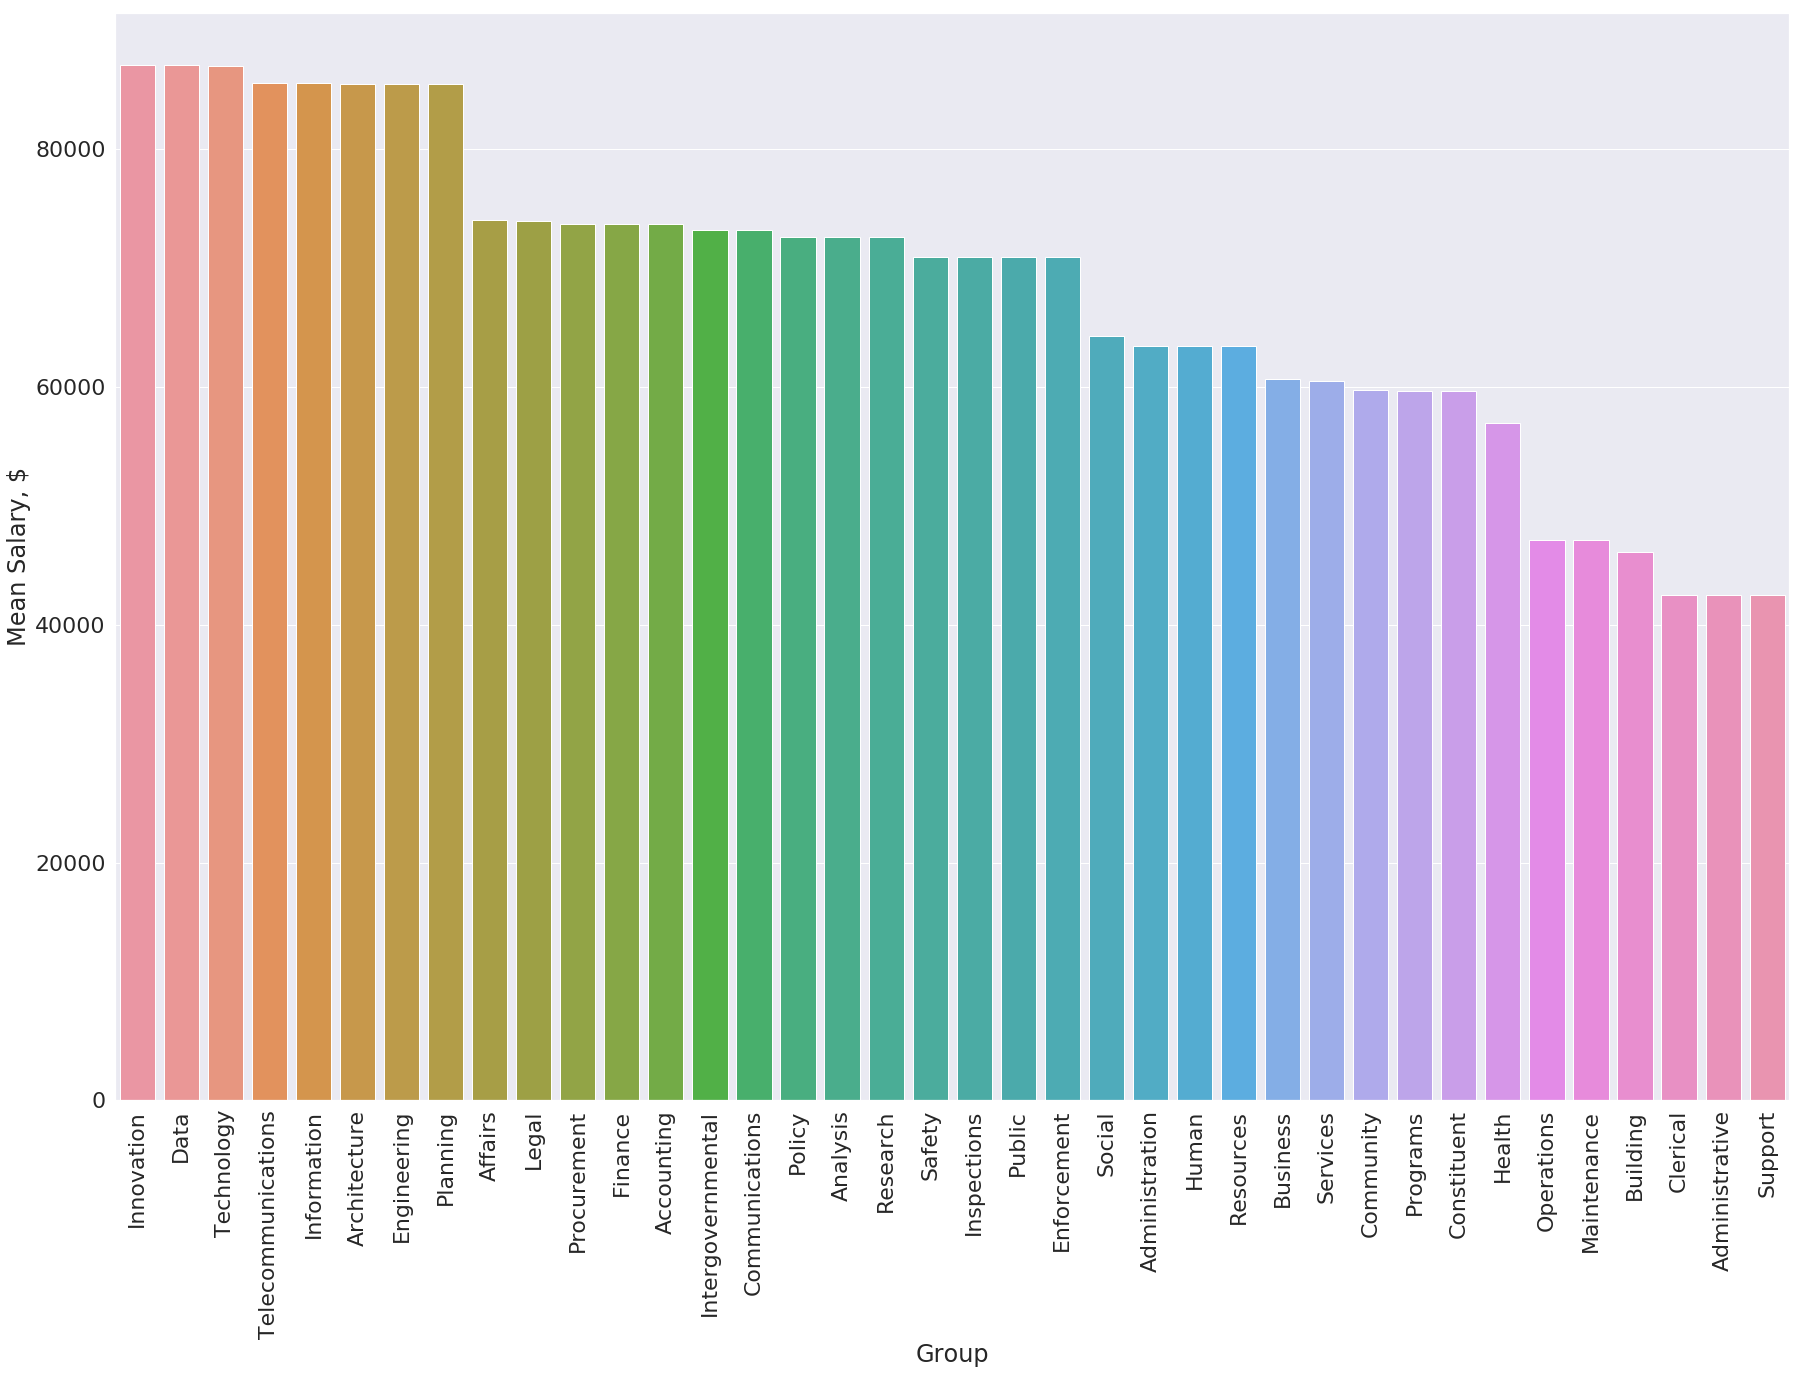

In [15]:
# X axis
df = pd.DataFrame(top_words, columns= ['Group'])
df

data.isna().sum()
data.dropna(subset = ['Job Category'], axis='rows', inplace=True)
data['Mean Salary'] = data['Salary Range From'] + ( data['Salary Range To'] - data['Salary Range From'] ) / 2
data[['Salary Range To', 'Salary Range From', 'Mean Salary']].head(10)

#Y axis
y = []
for word in top_words:
    y.append(data[data['Job Category'].str.contains(word)]['Mean Salary'].mean())
# print(y)
    
df['Mean Salary'] = pd.DataFrame(y)  
df = df.sort_values('Mean Salary', ascending=False)
df = df.reset_index(drop=True)
# df['Mean Salary'].dtype

# plotting

sns.set(rc={'figure.figsize':(30,20)}, font_scale = 2)
ax = sns.barplot(x = "Group", y = "Mean Salary", data = df)
plt.xticks(rotation=90)
fig = ax.get_figure()
ax.set(ylabel='Mean Salary, $')
fig.savefig("results/Mean_salary_job_category.png", bbox_inches='tight')
plt.show()

#doesn't work
# plot.savefig("Mean_salary_job_category.png")
# sns.set(font_scale = 2) #wtf, why it works here and not below???
# plot.map(label, "x")
# plot.set_ylabels('Mean Salary, $')# plot.set_xticklabels(rotation=90)
# plot.set_xticklabels(rotation=90)

# 13.07.2019

In [16]:
def top_words(col):
    text_rm_symbols = []
    flat_list = []
    top_words = []

    text_list = col.tolist() #how it works!? col = 'name_of_column'
#     data[col] = data[col].str.lower()
    
#     text_list = data[col].tolist()
    text_list_nan_rm = [x for x in text_list if str(x) != 'nan']

    for text in text_list_nan_rm:
        text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
        text_rm_symbols.append(text)

    for word in text_rm_symbols:
        flat_list = flat_list + word.split(' ')

    flat_list = list(filter(None, flat_list))
    top_stats = Counter(flat_list).most_common()
    for tup in top_stats:
        top_words.append(tup[0])
    return top_words

In [17]:
# def graf(col_of_interest, list_words):
def graf(col_of_interest):   
    x = top_words (data[col_of_interest])
    if len(x) < 40:
        col_top = x
    else:
        col_top = x[:30]
    col_top
    
    # X axis
    df = pd.DataFrame(col_top, columns= ['Group'])
    df

    if data[col_of_interest].isna().sum() != 0:
        data.dropna(subset = [col_of_interest], axis='rows', inplace=True)
        
    data['Mean Salary'] = data['Salary Range From'] + ( data['Salary Range To'] - data['Salary Range From'] ) / 2
#     data['col_of_interest'] = data['col_of_interest'].str.lower()
    
    #Y axis
    y = []
    for word in col_top:
        y.append(data[data[col_of_interest].str.contains(word)]['Mean Salary'].mean())

    df['Mean Salary'] = pd.DataFrame(y)  
    df = df.sort_values('Mean Salary', ascending=False)
    df = df.reset_index(drop=True)
    # df['Mean Salary'].dtype

    # plotting

    sns.set(rc={'figure.figsize':(30,20)}, font_scale = 2)
    ax = sns.barplot(x = "Group", y = "Mean Salary", data = df)
    plt.xticks(rotation=90)
    fig = ax.get_figure()
    ax.set(ylabel='Mean Salary, $')
    plt.show()
    name = col_of_interest.replace(' ', '_')
    return (plt.show(), fig.savefig("results/Mean_salary_" + name + ".png", bbox_inches='tight'), df)

In [18]:
column = 'Civil Service Title'
# x = top_words (data[column])
# if len(x) < 40:
#     col_top = x
# else:
#     col_top = x[:30]
# col_top

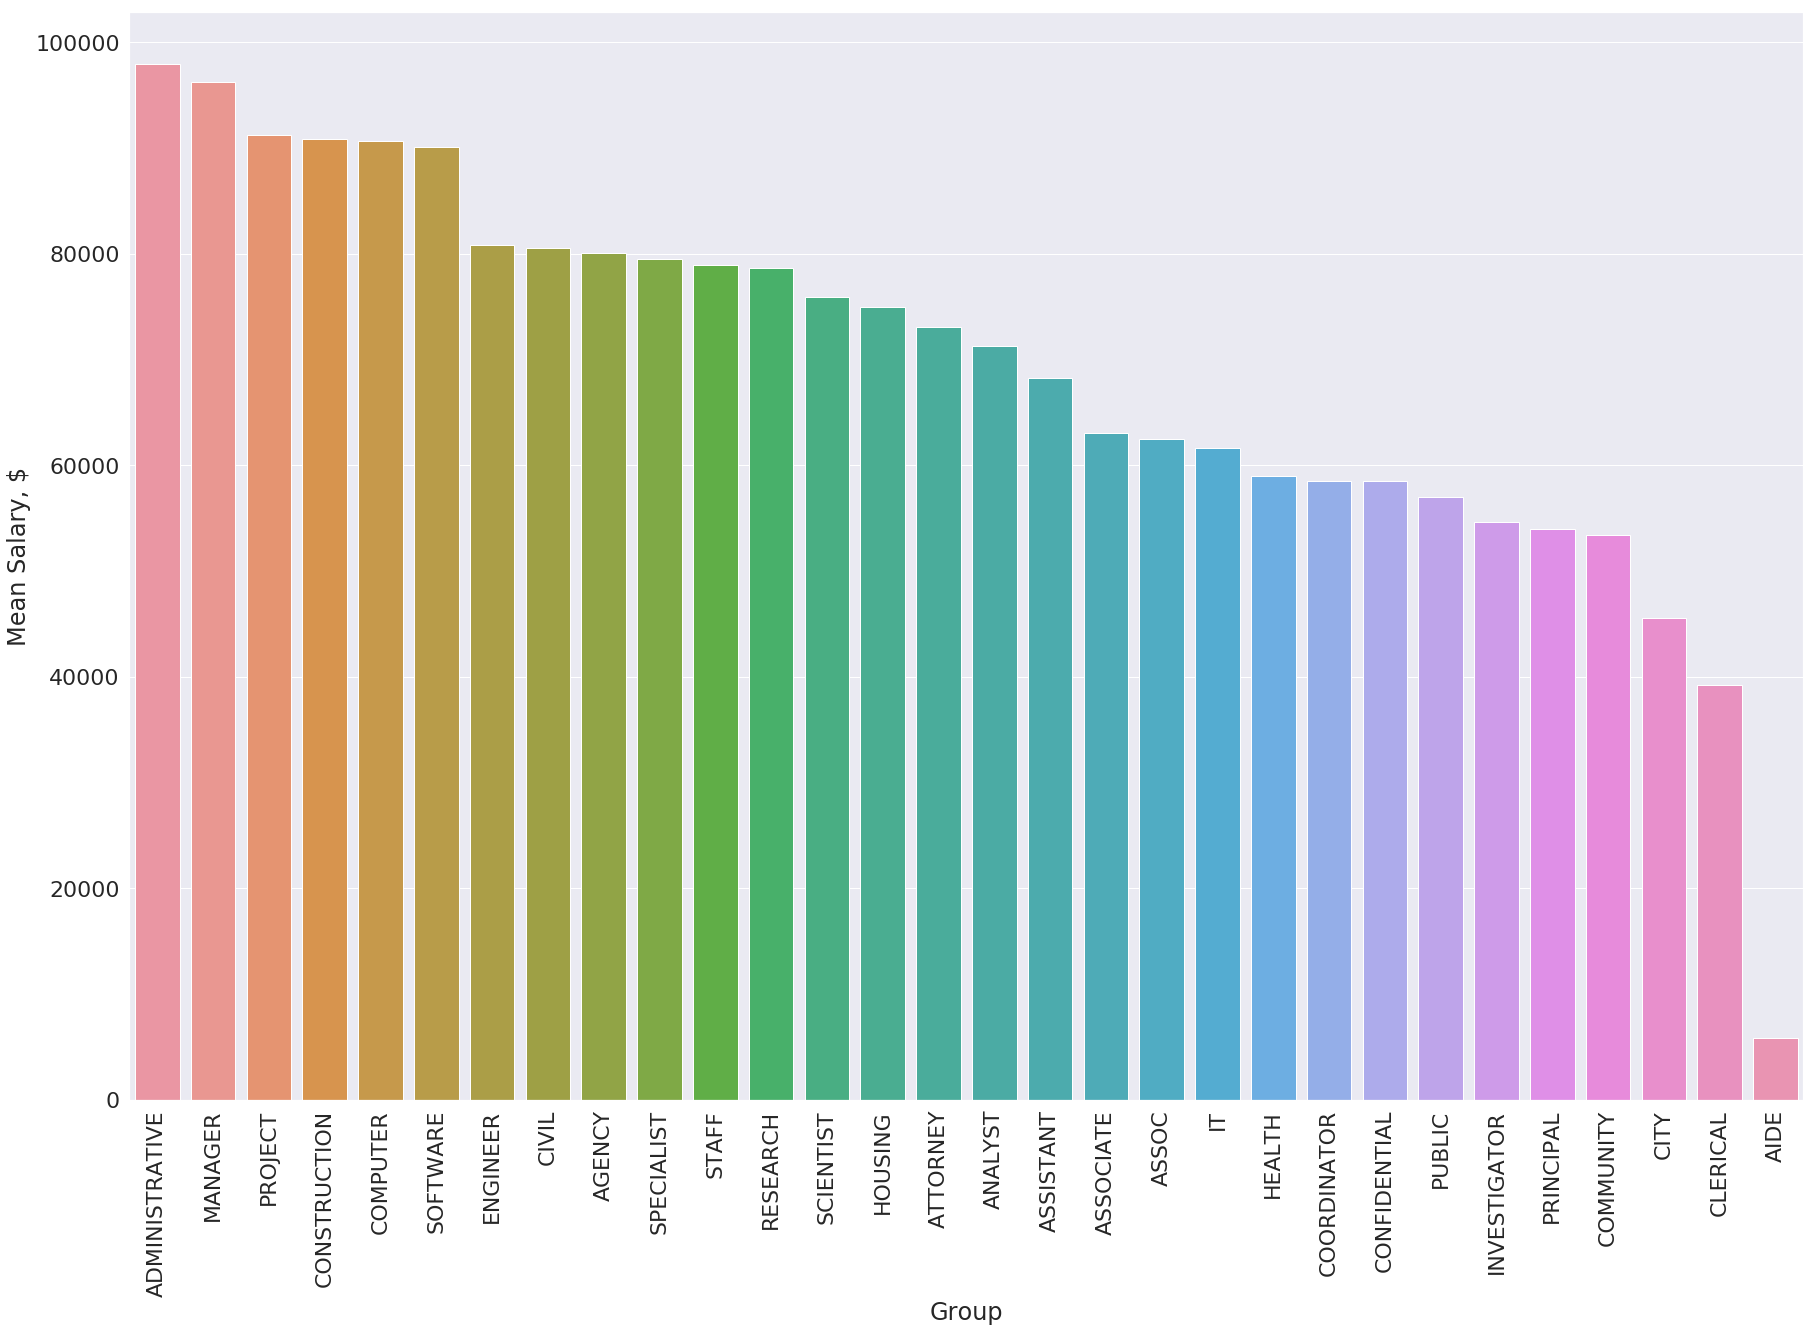

(None, None,              Group   Mean Salary
 0   ADMINISTRATIVE  97917.975862
 1          MANAGER  96234.249857
 2          PROJECT  91193.256098
 3     CONSTRUCTION  90870.092211
 4         COMPUTER  90685.795496
 5         SOFTWARE  90138.833333
 6         ENGINEER  80797.315485
 7            CIVIL  80500.147059
 8           AGENCY  80061.427326
 9       SPECIALIST  79532.801460
 10           STAFF  78889.228814
 11        RESEARCH  78615.644329
 12       SCIENTIST  75914.816962
 13         HOUSING  74942.238806
 14        ATTORNEY  73047.675111
 15         ANALYST  71294.366156
 16       ASSISTANT  68234.508717
 17       ASSOCIATE  63014.589986
 18           ASSOC  62459.583700
 19              IT  61581.800659
 20          HEALTH  58977.329345
 21     COORDINATOR  58551.648566
 22    CONFIDENTIAL  58495.859375
 23          PUBLIC  57030.756613
 24    INVESTIGATOR  54650.444444
 25       PRINCIPAL  53948.881355
 26       COMMUNITY  53444.871317
 27            CITY  45519.636183
 2

In [19]:
graf(column)
# graf(column, col_top)
# fig.savefig("results/Mean_salary_Civil_Service_Title.png")

### Business Title

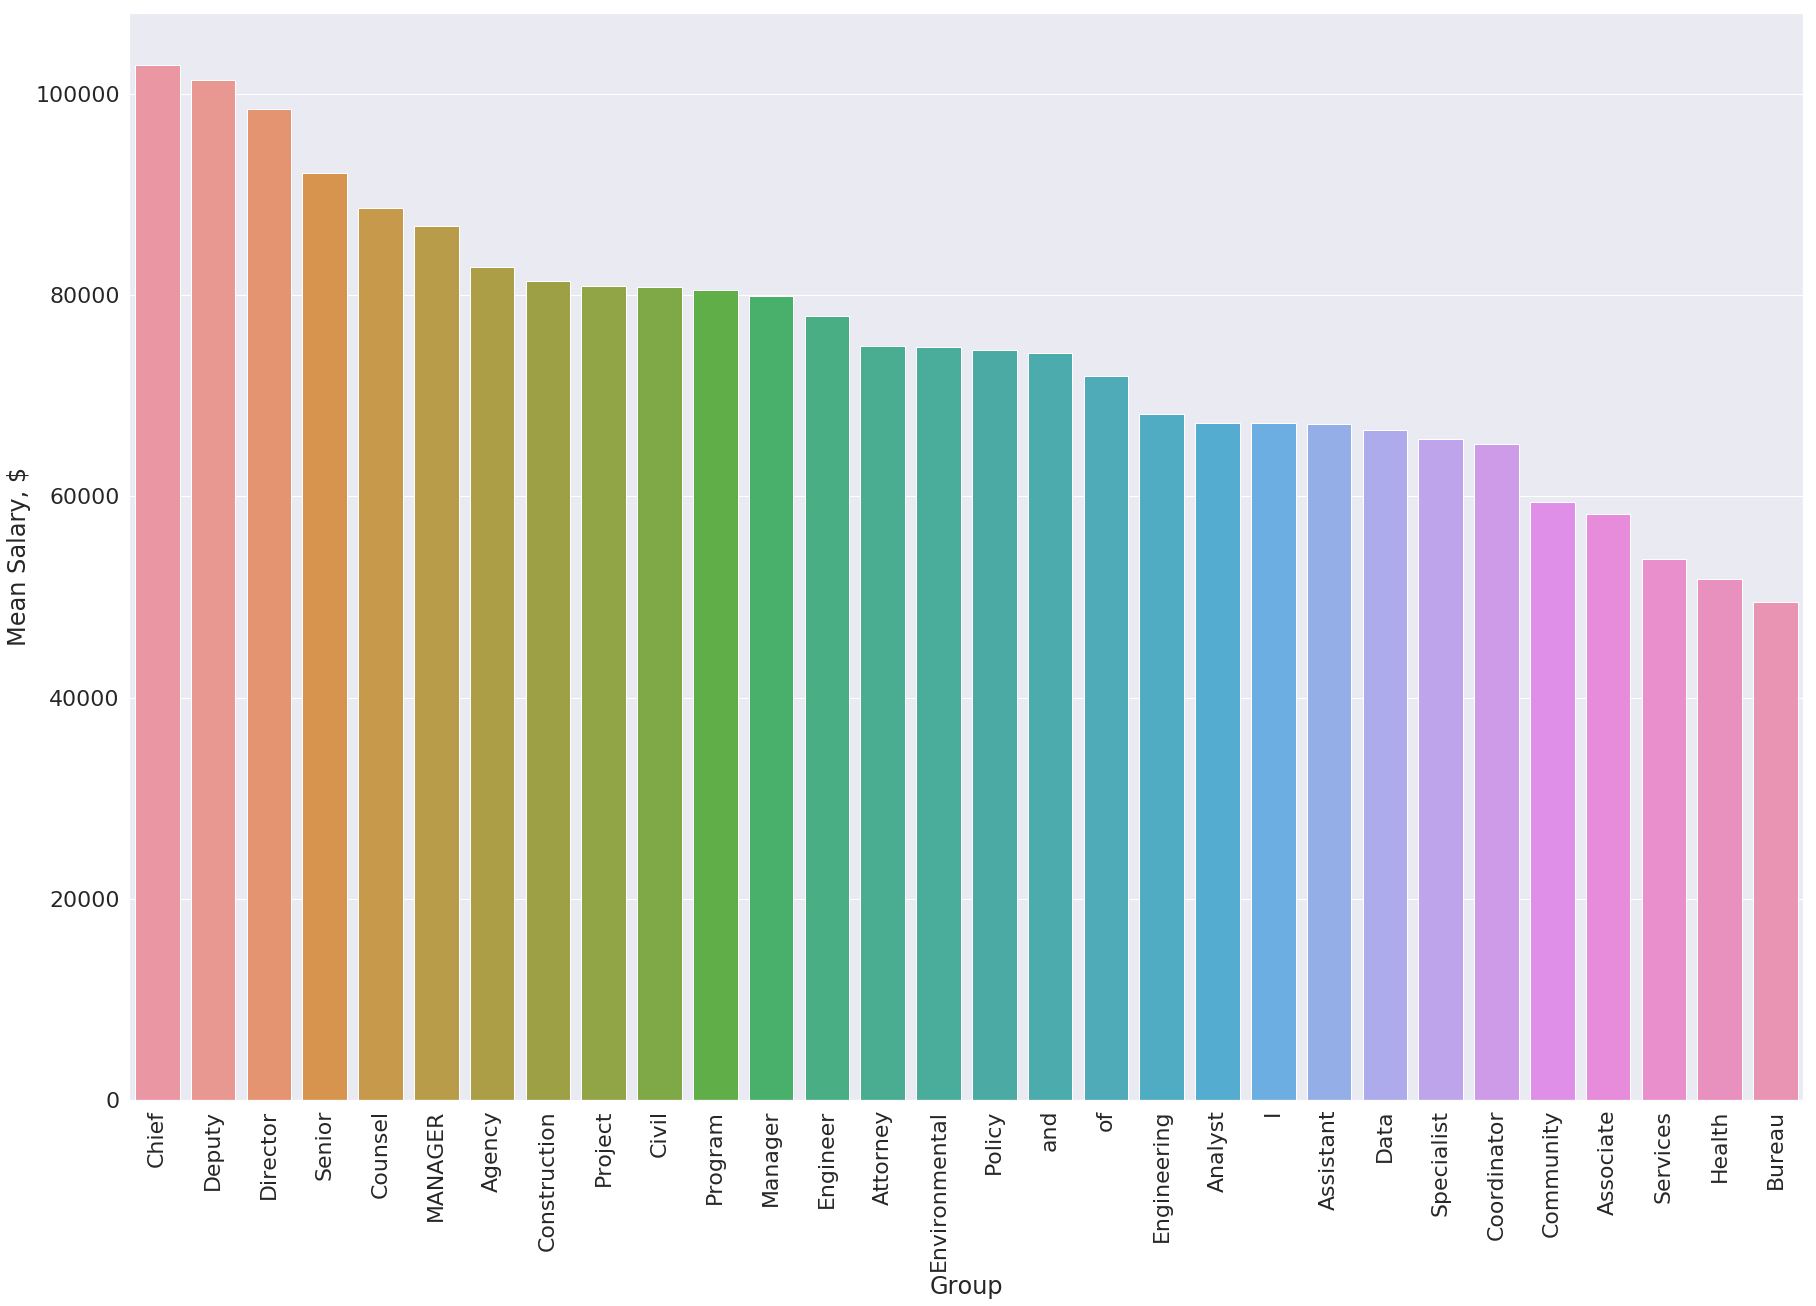

(None, None,             Group    Mean Salary
 0           Chief  102865.441351
 1          Deputy  101354.756944
 2        Director   98452.632809
 3          Senior   92127.093073
 4         Counsel   88651.425373
 5         MANAGER   86829.067545
 6          Agency   82751.933226
 7    Construction   81411.915362
 8         Project   80942.007587
 9           Civil   80825.217593
 10        Program   80485.635238
 11        Manager   79874.632042
 12       Engineer   77895.255594
 13       Attorney   74923.722222
 14  Environmental   74864.218507
 15         Policy   74556.095238
 16            and   74222.006778
 17             of   71975.365871
 18    Engineering   68226.883333
 19        Analyst   67325.175868
 20              I   67266.851229
 21      Assistant   67140.640323
 22           Data   66586.041324
 23     Specialist   65662.853936
 24    Coordinator   65228.856814
 25      Community   59420.278134
 26      Associate   58270.603661
 27       Services   53811.741025
 2

In [20]:
column = 'Business Title'
graf(column)

# 14.07.2019

In [21]:
data = data.reset_index(drop=True)
data.head()

,Job ID,Agency,Posting Type,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date,Mean Salary
0,132292,NYC HOUSING AUTHORITY,External,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Drivers License valid in t...,Click the Apply Now button.,NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24,NaN,12122013,07022019,53244.0
1,132292,NYC HOUSING AUTHORITY,Internal,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Drivers License valid in t...,Click the Apply Now button.,NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24,NaN,12122013,07022019,53244.0
2,133921,NYC HOUSING AUTHORITY,Internal,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,35.00,35.00,Hourly,DMP-Contract & Analysis Unit,Dept of Management & Planning,Responsibilities of selected candidates will i...,1. Five years of full-time satisfactory experi...,NaN,SPECIAL NOTE 1. This is a temporary assign...,Click the Apply Now button.,NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09,NaN,01082014,07022019,35.0
3,133921,NYC HOUSING AUTHORITY,External,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,35.00,35.00,Hourly,DMP-Contract & Analysis Unit,Dept of Management & Planning,Responsibilities of selected candidates will i...,1. Five years of full-time satisfactory experi...,NaN,SPECIAL NOTE 1. This is a temporary assign...,Click the Apply Now button.,NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09,NaN,01082014,07022019,35.0
4,137433,DEPT OF HEALTHMENTAL HYGIENE,Internal,Contract Analyst,PROCUREMENT ANALYST,12158,3,"Finance, Accounting, & Procurement",F,50598.00,85053.00,Annual,42-09 28th Street,HIV Administration,OPEN TO PERMANENT PROCUREMENT ANALYSTS ONLY. ...,1. A baccalaureate degree from an accredited c...,Strong analytical background advanced profici...,NaN,Apply online with a cover letter to httpsa127-...,NaN,"42-09 28th Street, Long Island City, NY",NaN,New York City residency is generally required ...,2013-12-09,NaN,12092013,07022019,67825.5


In [22]:
def top_words(col):
    text_rm_symbols = []
    flat_list = []
    top_words = []

    data[col] = data[col].str.lower()
    
    text_list = data[col].tolist()
    
    text_list_nan_rm = [x for x in text_list if str(x) != 'nan']

    for text in text_list_nan_rm:
        text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
        text_rm_symbols.append(text)

    for word in text_rm_symbols:
        flat_list = flat_list + word.split(' ')

    flat_list = list(filter(None, flat_list))
    top_stats = Counter(flat_list).most_common()
    for tup in top_stats:
        top_words.append(tup[0])
    return (top_words)

In [23]:
def top_salaries(col):
    x = top_words (col)
    df = pd.DataFrame(x, columns= ['words'])
    y = []
    for word in col:
        y.append(data[data[col].str.contains(word)]['Mean Salary'].mean())
    df['Mean Salary'] = pd.DataFrame(y)
    df = df.sort_values('Mean Salary', ascending=False)
    df = df.reset_index(drop=True)
    return df

In [24]:
def graf(col_of_interest):   
    x = top_words (col_of_interest)
    if len(x) < 40:
        col_top = x
    else:
        col_top = x[:30]
    col_top
    
    # X axis
    df = pd.DataFrame(col_top, columns= ['Group'])
    df

    if data[col_of_interest].isna().sum() != 0:
        data.dropna(subset = [col_of_interest], axis='rows', inplace=True)
        
    data['Mean Salary'] = data['Salary Range From'] + ( data['Salary Range To'] - data['Salary Range From'] ) / 2
#     data['col_of_interest'] = data['col_of_interest'].str.lower()
    
    #Y axis
    y = []
    for word in col_top:
        y.append(data[data[col_of_interest].str.contains(word)]['Mean Salary'].mean())

    df['Mean Salary'] = pd.DataFrame(y)  
    df = df.sort_values('Mean Salary', ascending=False)
    df = df.reset_index(drop=True)
    # df['Mean Salary'].dtype

    # plotting

    sns.set(rc={'figure.figsize':(30,20)}, font_scale = 2)
    ax = sns.barplot(x = "Group", y = "Mean Salary", data = df)
    plt.xticks(rotation=90)
    fig = ax.get_figure()
    ax.set(ylabel='Mean Salary, $')
    ax.set_title('Words in ' + col_of_interest)
    plt.show()
    name = col_of_interest.replace(' ', '_')
    return (plt.show(), fig.savefig("results/Mean_salary_" + name + ".png", bbox_inches='tight'), df)

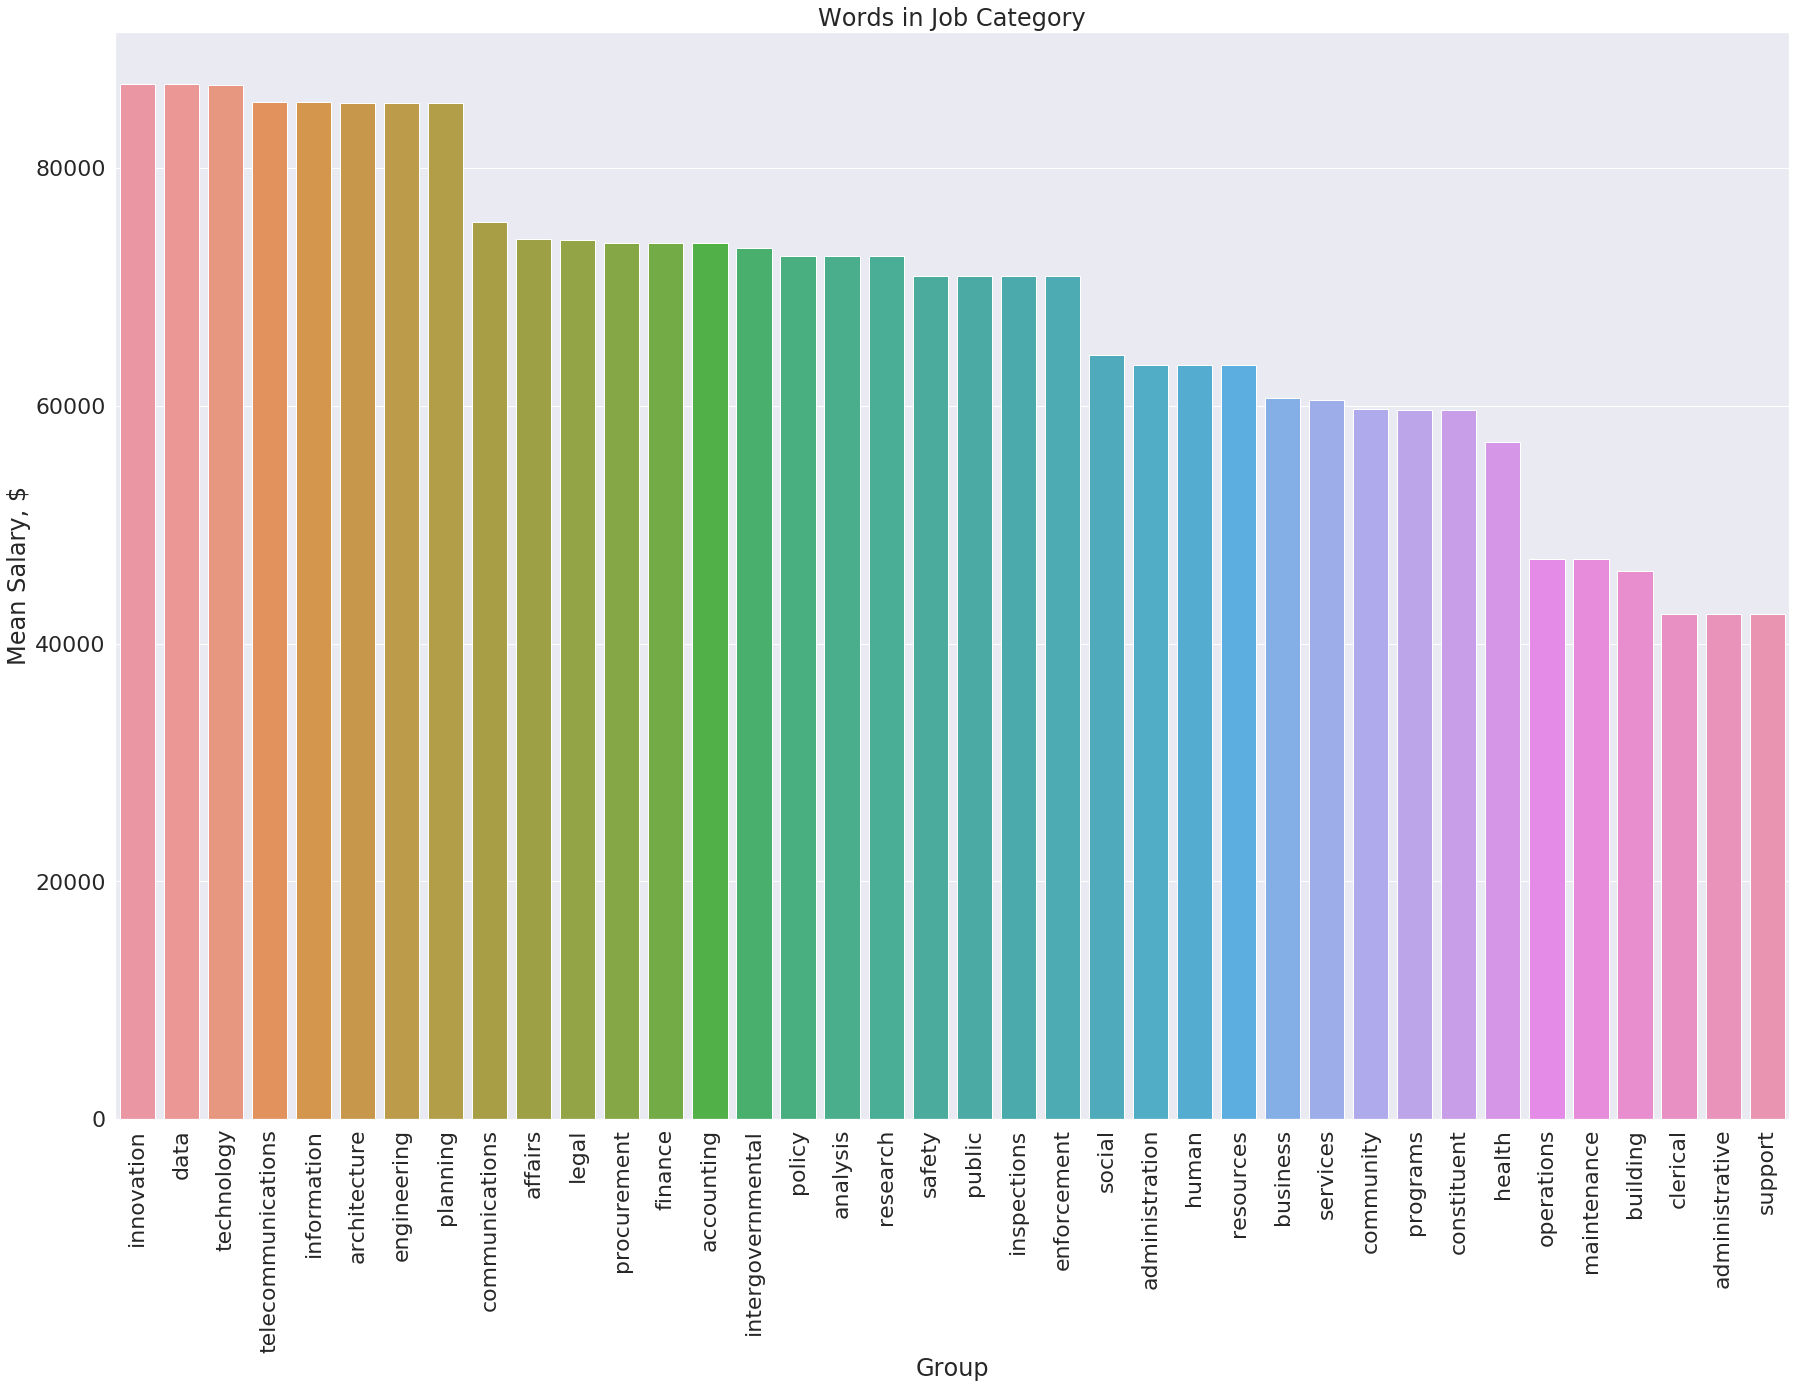

(None, None,                  Group   Mean Salary
 0           innovation  87077.816040
 1                 data  87077.816040
 2           technology  86976.466257
 3   telecommunications  85528.145161
 4          information  85528.145161
 5         architecture  85434.542095
 6          engineering  85434.542095
 7             planning  85434.542095
 8       communications  75426.314138
 9              affairs  73993.821774
 10               legal  73921.640331
 11         procurement  73691.591961
 12             finance  73691.591961
 13          accounting  73691.591961
 14   intergovernmental  73236.406713
 15              policy  72574.489824
 16            analysis  72574.489824
 17            research  72564.194391
 18              safety  70936.572645
 19              public  70936.572645
 20         inspections  70936.572645
 21         enforcement  70936.572645
 22              social  64251.355995
 23      administration  63413.979680
 24               human  63413.979680


In [25]:
column = 'Job Category'
graf(column)

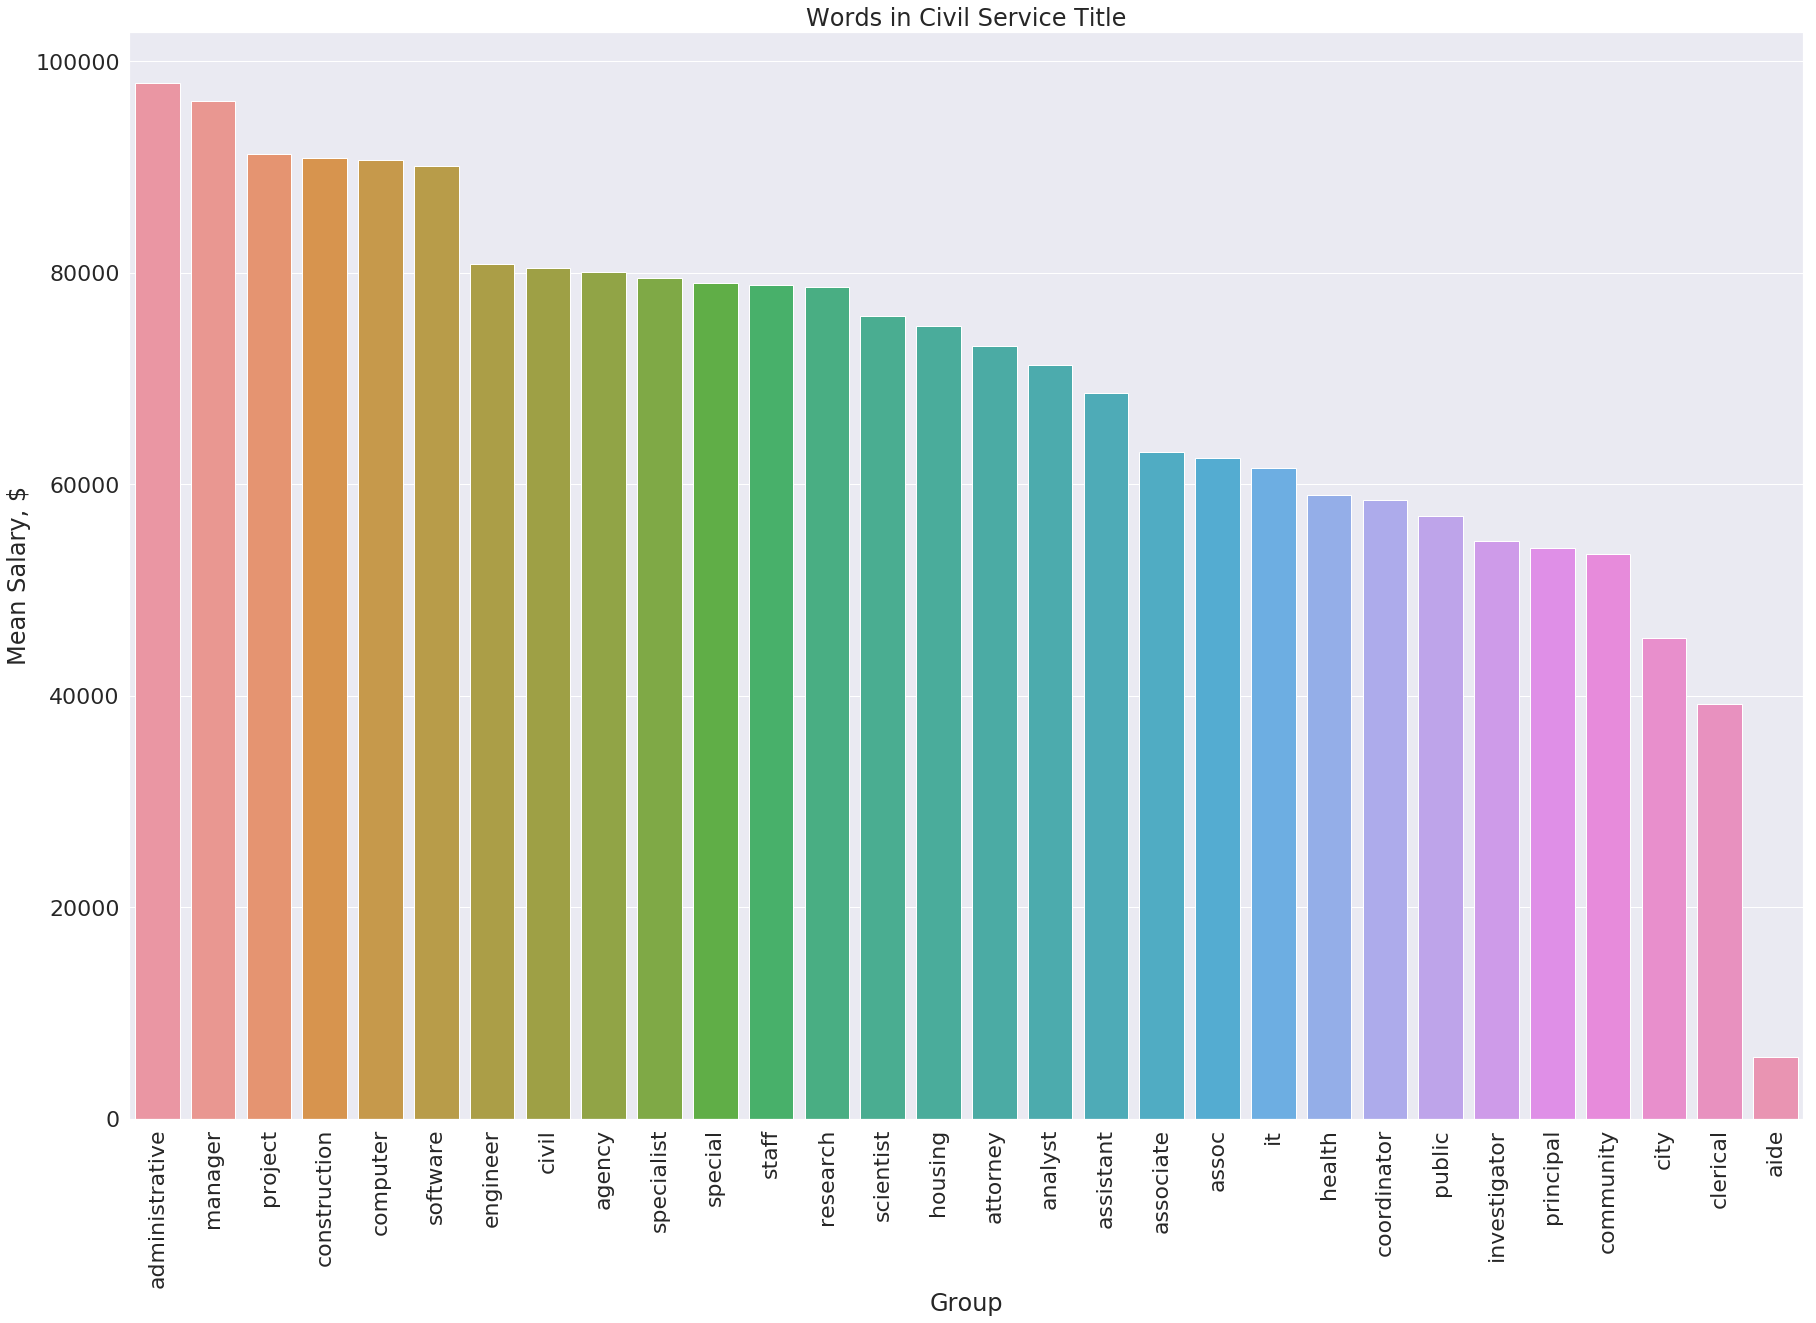

(None, None,              Group   Mean Salary
 0   administrative  97917.975862
 1          manager  96234.249857
 2          project  91193.256098
 3     construction  90870.092211
 4         computer  90685.795496
 5         software  90138.833333
 6         engineer  80797.315485
 7            civil  80500.147059
 8           agency  80061.427326
 9       specialist  79532.801460
 10         special  79026.079375
 11           staff  78889.228814
 12        research  78615.644329
 13       scientist  75914.816962
 14         housing  74942.238806
 15        attorney  73047.675111
 16         analyst  71294.366156
 17       assistant  68645.944794
 18       associate  63014.589986
 19           assoc  62459.583700
 20              it  61533.673530
 21          health  58977.329345
 22     coordinator  58551.648566
 23          public  57030.756613
 24    investigator  54650.444444
 25       principal  53948.881355
 26       community  53444.871317
 27            city  45500.892993
 2

In [26]:
column = 'Civil Service Title'
graf(column)

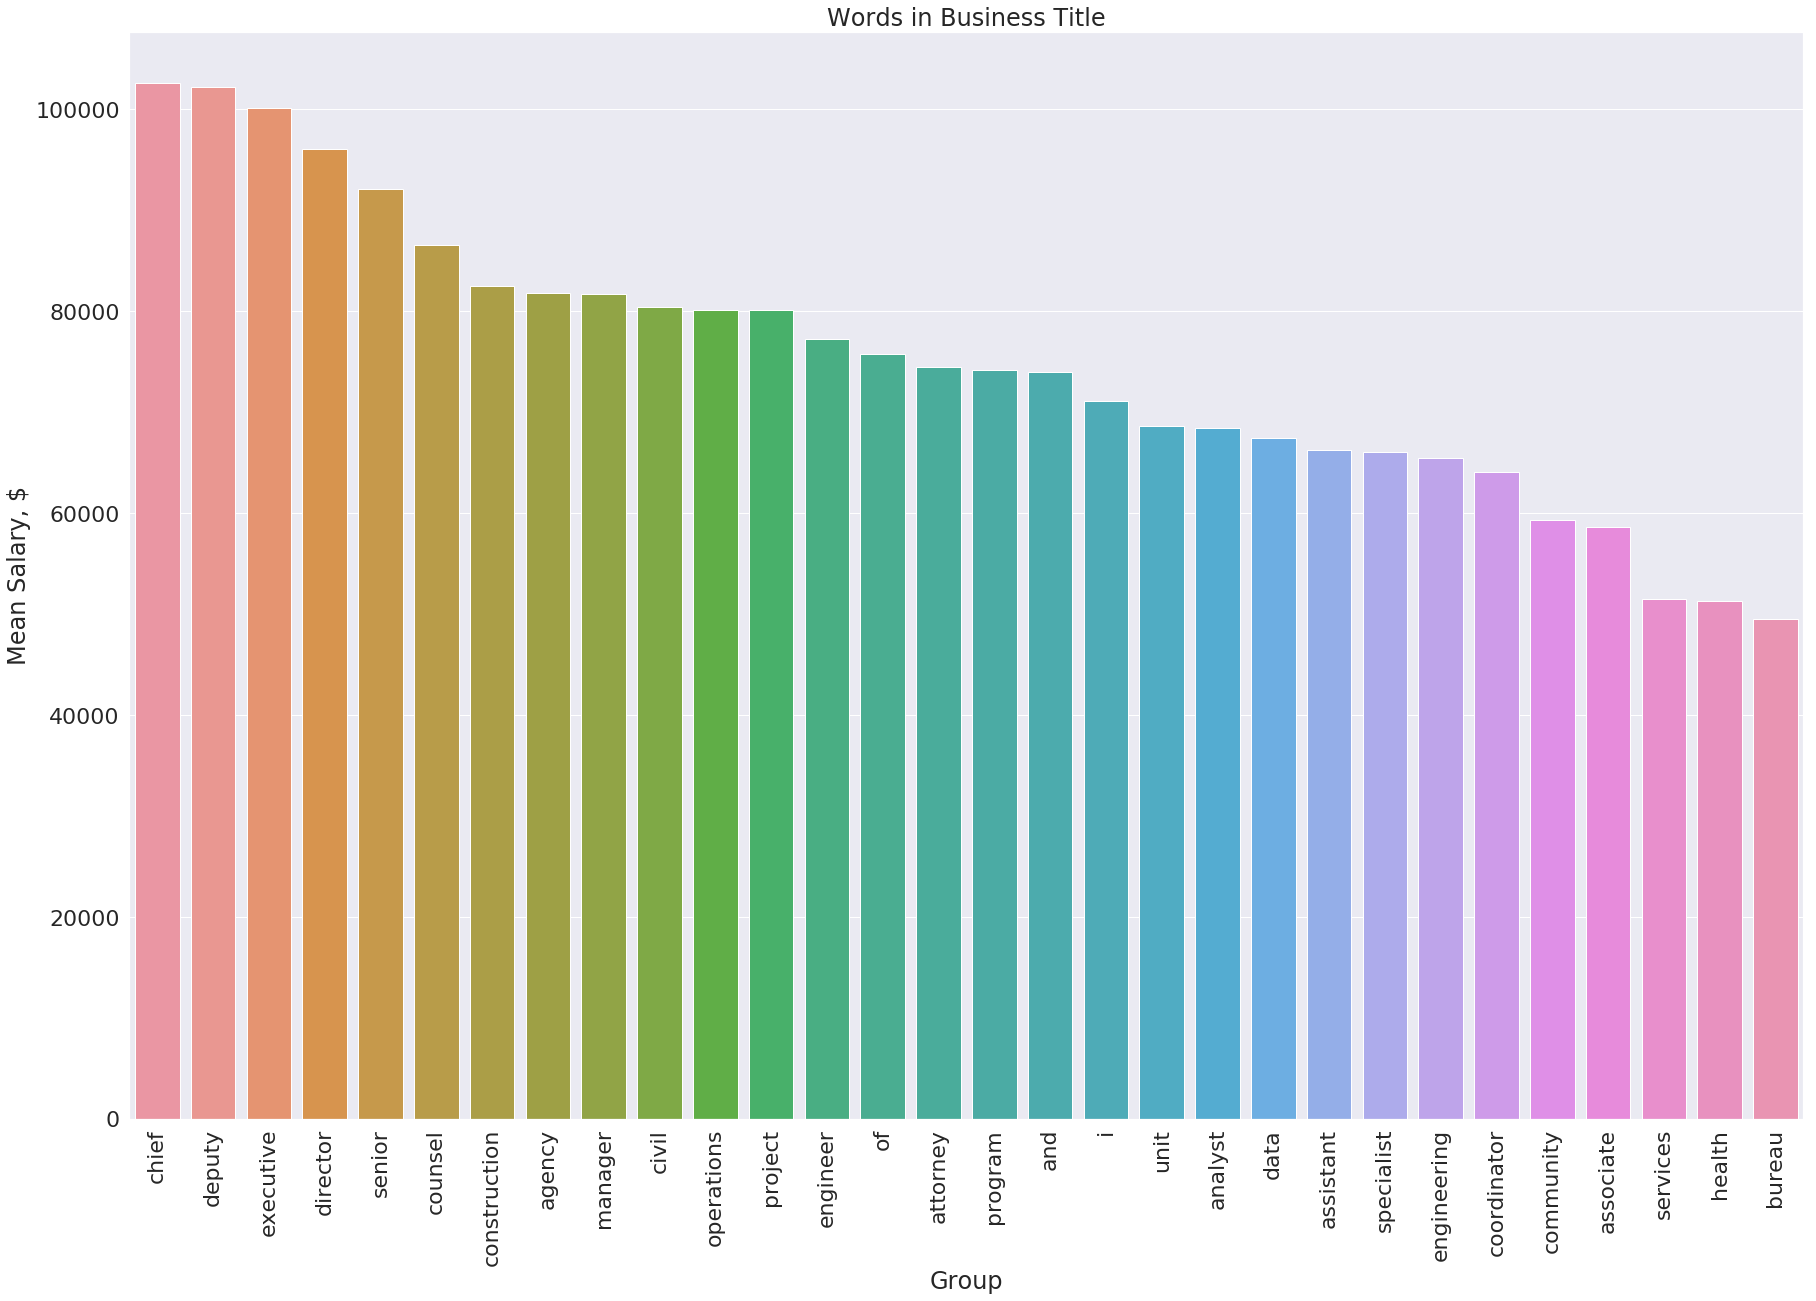

(None, None,            Group    Mean Salary
 0          chief  102569.710439
 1         deputy  102218.232258
 2      executive  100184.204103
 3       director   96077.961398
 4         senior   92136.732770
 5        counsel   86540.867089
 6   construction   82557.213590
 7         agency   81801.650833
 8        manager   81685.682954
 9          civil   80439.872807
 10    operations   80178.856610
 11       project   80176.667727
 12      engineer   77241.741170
 13            of   75762.120370
 14      attorney   74518.069767
 15       program   74143.003005
 16           and   74006.291960
 17             i   71120.427774
 18          unit   68636.643483
 19       analyst   68457.720587
 20          data   67430.050491
 21     assistant   66216.670089
 22    specialist   66095.455975
 23   engineering   65431.736111
 24   coordinator   64098.814478
 25     community   59285.954294
 26     associate   58644.601854
 27      services   51498.729667
 28        health   51285.63922

In [27]:
column = 'Business Title'
graf(column)
# top_words(column)